In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

rfm  = pd.read_csv('../data/rfm.csv')

In [11]:
scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(
    rfm[['Recency', 'Frequency', 'Monetary']]
)

rfm_scaled = pd.DataFrame(
    rfm_scaled,
    columns=['Recency', 'Frequency', 'Monetary'],
    index=rfm.index
)


In [12]:
pca = PCA()
pca.fit(rfm_scaled)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.55342578, 0.30256784, 0.14400638])

O **PCA (Principal Component Analysis)** foi utilizado com o objetivo de **reduzir a dimensionalidade dos dados RFM**, preservando a maior parte da informação relevante contida nas variáveis originais (Recency, Frequency e Monetary). Embora o conjunto RFM possua apenas três variáveis, elas apresentam escalas diferentes e correlação entre si, especialmente entre Frequency e Monetary, o que pode introduzir redundância na análise.

Ao aplicar o PCA sobre os dados escalados, as variáveis originais são transformadas em componentes principais não correlacionados, que concentram a variância dos dados de forma mais eficiente.

**os dois primeiros componentes concentram aproximadamente 86% da variância total**, o que representa uma preservação elevada da informação original.
**Essa abordagem permite analisar e comunicar de forma mais clara a separação entre os clusters, facilitando a interpretação dos resultados e o storytelling do projeto, sem perdas significativas de informação.**

In [13]:
pca = PCA(n_components=2, random_state=0)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm_pca = pd.DataFrame(
    rfm_pca,
    columns=['PC1', 'PC2'],
    index=rfm.index
)

utilizamos **n_components = 2** pois queremos PCA1 e PCA2 que represetam 86% dos dados, e criamos estas colunas em rfm_Pca


In [14]:
rfm_pca.head(3)

,PC1,PC2
0,4.148721,5.496105
1,0.752401,-0.665781
2,0.004825,-0.190245


### Criando o modelo do Kmeans e método do cotovelo :

In [15]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=20)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

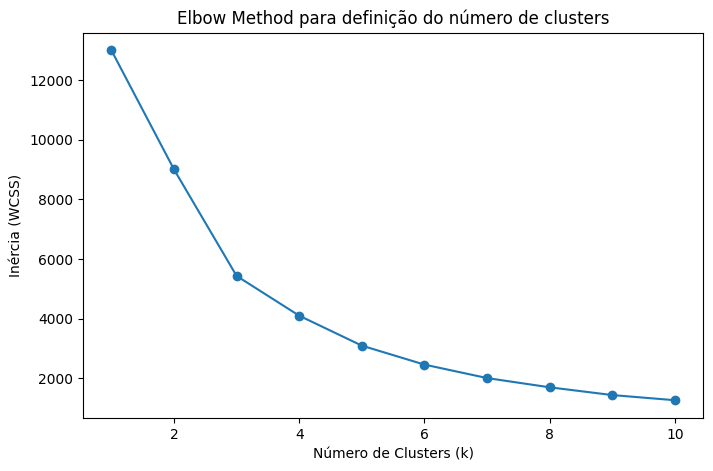

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (WCSS)')
plt.title('Elbow Method para definição do número de clusters')
plt.show()


Utilizamos o **método do cotovelo** para achar o **número k de clusters**, graficamente, o método consiste em plotar o número de clusters no eixo x e a inércia no eixo y. O ponto onde a curva deixa de apresentar uma queda acentuada e passa a se estabilizar forma uma espécie de “cotovelo”, indicando um **trade-off** entre complexidade do modelo e capacidade de explicação dos dados.

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

In [18]:
rfm.to_csv("../data/rfm_modeled.csv", index=False)
rfm_pca.to_csv("../data/rfm_pca.csv", index=False)
rfm_scaled.to_csv("../data/rfm_scaled.csv", index=False)
